## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Importing Dataset 

In [2]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Checking Correlation 

<AxesSubplot:>

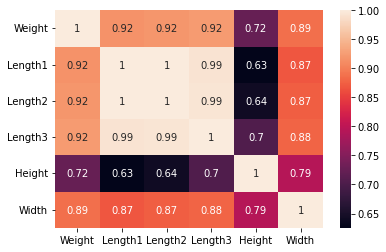

In [3]:
sns.heatmap(df.corr(), annot=True)

## Rearranging the dataset(Columns**) 

In [4]:
df=df[['Species','Length1','Length2','Length3','Height','Width','Weight']]
df.head()

,Species,Length1,Length2,Length3,Height,Width,Weight
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


## Splting Dependent and Independent Features 

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Encoding the categorical features 

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))
print(X)

[[ 1.      0.      0.     ... 30.     11.52    4.02  ]
 [ 1.      0.      0.     ... 31.2    12.48    4.3056]
 [ 1.      0.      0.     ... 31.1    12.3778  4.6961]
 ...
 [ 0.      0.      0.     ... 13.8     2.277   1.2558]
 [ 0.      0.      0.     ... 15.2     2.8728  2.0672]
 [ 0.      0.      0.     ... 16.2     2.9322  1.8792]]


## Spliting dataset into Training and Testing arrays 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=0)

## Training model  

In [8]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Testing model  

In [9]:
y_pred = reg.predict(X_test)
y_pred

array([ 398.61827756,  118.1919715 ,  209.10177893,  205.56885426,
        672.88938547,  860.896989  ,  657.29247677,  417.54129463,
        975.45211747,  146.3059209 ,  292.7786633 ,  531.32841528,
        719.09938625,  996.85688646, -119.25049893,   22.96407399,
        150.23493192,  960.20014103,  185.50967067,  733.92460995,
       -110.48609746,  503.22165951,  170.99861741, 1132.89101923,
        -29.76837845,  478.7055479 ,  708.34205258,  246.95304976,
        871.73820789,    1.45742631,  582.13002673,  166.26850403,
        960.20014103,  375.85454896,  581.09753868,  269.831314  ,
        365.85519034,  647.91353923,  701.05905993,  163.57276573])

## R2_Score 

In [10]:
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,y_pred))

r2 score: 0.8264222716508784
